## import time
import numpy as np
import pandas as pd
import geocoder
pd.options.mode.chained_assignment = None
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
import re
import numpy as np
import pandas as pd
import missingno as mno

In [66]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [67]:
df = pd.read_csv('99acres.com_geocoded.csv')
df.drop(columns='Unnamed: 0', inplace=True)
print(df.shape)
df.head(2)

(21928, 15)


,title,price_per_month,deposit,rooms,baths,FOR FAMILY,FOR SINGLE MEN,FOR SINGLE WOMEN,FURNISHED,price,address,gmaps_info,coord,lat,lng
0,2 BHK Flat for rent in Wadala East,"₹ 55,000",₹ 200000,BHK2,2,1.0,1.0,1.0,NaN,"['₹', '55,000', '/monthDeposit', '₹', '200000']","Wadala East, Mumbai",[{'address_components': [{'long_name': 'Wadala...,"(19.0088678, 72.8573828)",19.008868,72.857383
1,2 BHK Flat for rent in Bandra (West),"₹ 90,000",₹ 300000,BHK2,2,1.0,1.0,1.0,NaN,"['₹', '90,000', '/monthDeposit', '₹', '300000']","Bandra (West), Mumbai",[{'address_components': [{'long_name': 'Bandra...,"(19.0595596, 72.8295287)",19.059560,72.829529


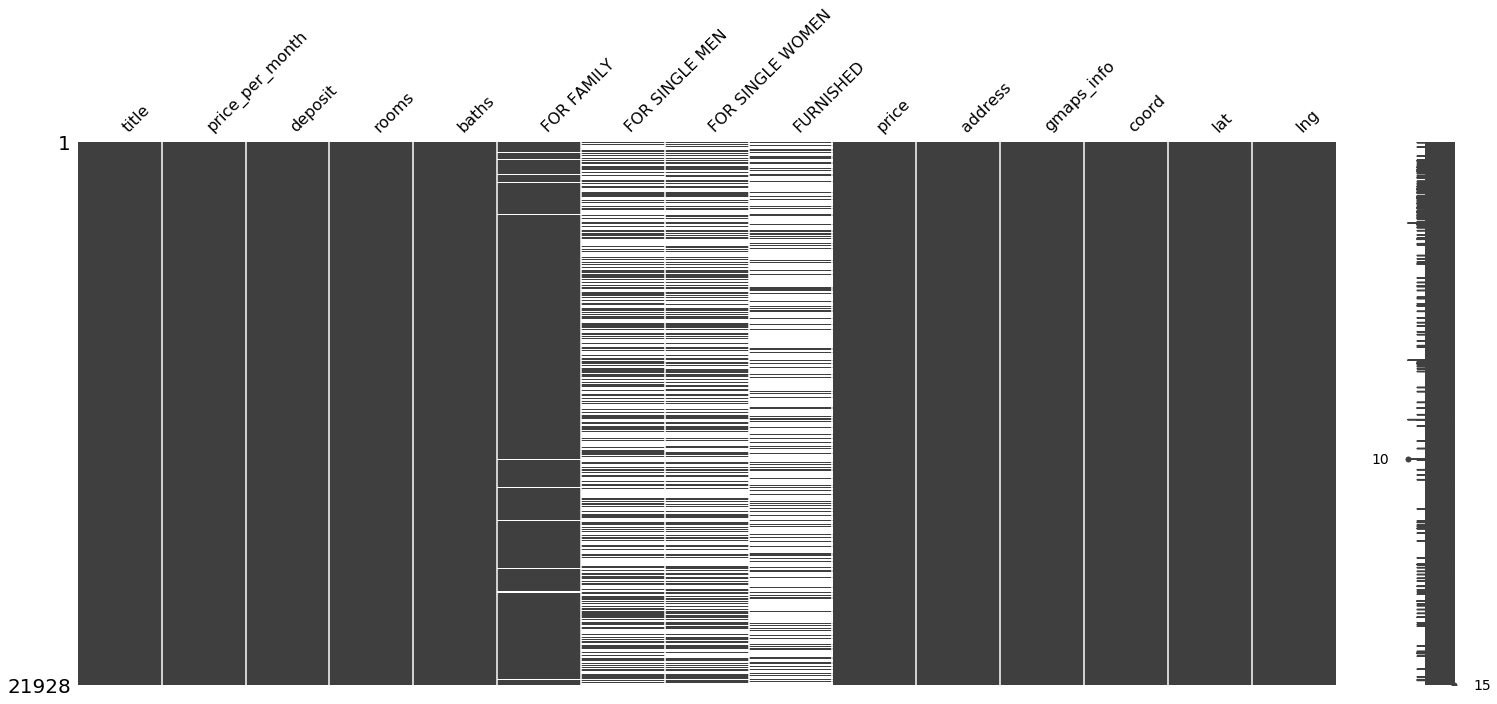

In [68]:
mno.matrix(df);

### drop columns

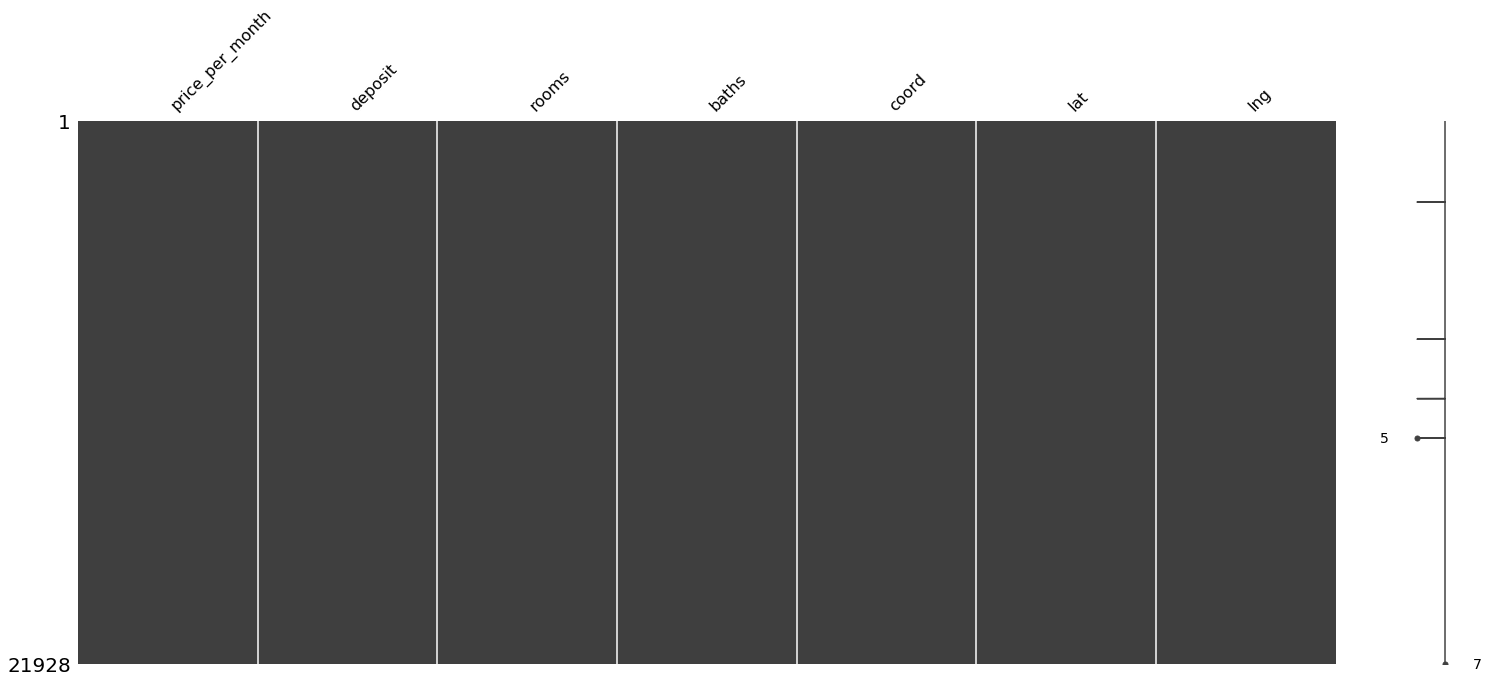

In [69]:
df = df.drop(columns=['title','FURNISHED','price','address', 'gmaps_info']
             +[c for c in df.columns if 'FOR' in c])
mno.matrix(df);

### drop duplicates rows

In [70]:
print(len(df))
df.drop_duplicates(inplace=True)
print('---->', len(df))

21928
----> 14733


## cleaning 

In [71]:
def parse_price(x):
    try: return float(x.split()[-1].replace(',', ''))
    except: return np.nan
df['price_per_month'] = df['price_per_month'].apply(parse_price)
df.head()

,price_per_month,deposit,rooms,baths,coord,lat,lng
0,55000.0,₹ 200000,BHK2,2,"(19.0088678, 72.8573828)",19.008868,72.857383
1,90000.0,₹ 300000,BHK2,2,"(19.0595596, 72.8295287)",19.059560,72.829529
2,28000.0,month(s) rent,BHK2,2,"(19.2560653, 72.9748448)",19.256065,72.974845
3,34500.0,₹ 150000,BHK2,2,"(19.2004454, 72.87370229999999)",19.200445,72.873702
4,90000.0,month(s) rent,BHK2,2,"(19.1153798, 72.9091436)",19.115380,72.909144


In [72]:
df['price_per_month'].isna().sum()

3

In [73]:
def parse_deposit(x):
    try: return float(re.findall(r'\d+', x)[0])
    except: return np.nan
df['deposit'] = df['deposit'].apply(parse_deposit)
df.head()

,price_per_month,deposit,rooms,baths,coord,lat,lng
0,55000.0,200000.0,BHK2,2,"(19.0088678, 72.8573828)",19.008868,72.857383
1,90000.0,300000.0,BHK2,2,"(19.0595596, 72.8295287)",19.059560,72.829529
2,28000.0,NaN,BHK2,2,"(19.2560653, 72.9748448)",19.256065,72.974845
3,34500.0,150000.0,BHK2,2,"(19.2004454, 72.87370229999999)",19.200445,72.873702
4,90000.0,NaN,BHK2,2,"(19.1153798, 72.9091436)",19.115380,72.909144


In [74]:
def parse_beds(x):
    try: return float(re.findall(r'\d+', x)[0])
    except: return np.nan
df['rooms'] = df['rooms'].apply(parse_beds)
df.head()

,price_per_month,deposit,rooms,baths,coord,lat,lng
0,55000.0,200000.0,2.0,2,"(19.0088678, 72.8573828)",19.008868,72.857383
1,90000.0,300000.0,2.0,2,"(19.0595596, 72.8295287)",19.059560,72.829529
2,28000.0,NaN,2.0,2,"(19.2560653, 72.9748448)",19.256065,72.974845
3,34500.0,150000.0,2.0,2,"(19.2004454, 72.87370229999999)",19.200445,72.873702
4,90000.0,NaN,2.0,2,"(19.1153798, 72.9091436)",19.115380,72.909144


In [81]:
df.dtypes

price_per_month    float64
deposit            float64
rooms              float64
baths                int64
coord               object
lat                float64
lng                float64
dtype: object

### export

In [80]:
df.to_csv('cleaned_99acres.com.csv', index=False)